In [1]:
import numpy as np
import tensorflow as tf

In [4]:
minist = tf.keras.datasets.mnist

In [6]:
(x_train, y_train),(x_test, y_test) = minist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 333us/sample - loss: 0.2209 - accuracy: 0.9345
Epoch 2/5
60000/60000 [==============================] - 19s 317us/sample - loss: 0.0974 - accuracy: 0.9697
Epoch 3/5
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0675 - accuracy: 0.9782
Epoch 4/5
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0538 - accuracy: 0.9825
Epoch 5/5
60000/60000 [==============================] - 20s 330us/sample - loss: 0.0422 - accuracy: 0.9864


In [13]:
loss, accyracy = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
accyracy

0.9801

In [17]:
img = x_test[0]
img.shape

(28, 28)

In [22]:
inp = np.array([img])
inp.shape

(1, 28, 28)

In [23]:
out = model.predict(inp)

In [24]:
out.shape

(1, 10)

In [25]:
np.argmax(out)

7

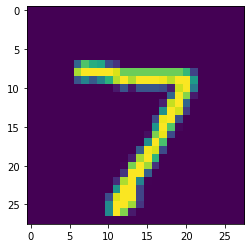

In [28]:
from matplotlib import pyplot as plt

plt.imshow(img)

In [30]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [31]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

In [35]:
model.save_weights(checkpoint_path)

In [36]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.433120651245117, 0.1042]